# CUSTOMER CHURN ANALYSIS:

Name: Vaibhav Tayade
    
Contact details: 8087970061

email id: vaibhav_t29@rediffmail.com

# IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# IMPORTING FILE:

In [2]:
# creating dataframe 
df = pd.read_csv('customer churn analysis.csv')

In [3]:
# checking top 5 rows of dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking column headings
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# CHECKING VARIOUS CATEGORICAL DATA:

In [5]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [10]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [12]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [13]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [15]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [20]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [22]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [23]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [24]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
# Droping customerID columns as it is irrelevant to our dataset.
df.drop('customerID', axis=1, inplace=True)

In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observation: In the above describtion of the dataset, Only Tenure and MonthlyCharges column are true nuemerical column, We can see that in them, that Mean is higher than median in both Tenure and Monthlycharges column.

NOTE: Only Tenure, MonthlyCharges and TotalCharges are true neumerical columns. We can check for outliers and skewness in them.

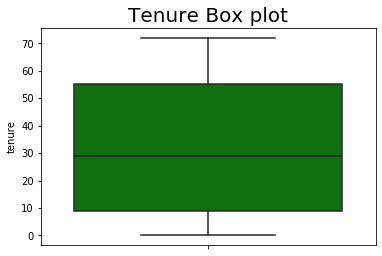

In [27]:
# boxplot 1 >>>
plt.title('Tenure Box plot', fontsize = 20)
sns.boxplot(df['tenure'],color='green',orient='v')

Observation: No outliers in the Tenure column

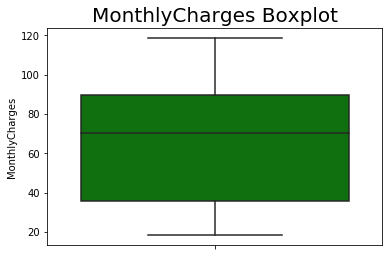

In [28]:
# boxplot 2 >>>
plt.title('MonthlyCharges Boxplot', fontsize = 20)
sns.boxplot(df['MonthlyCharges'],color='green',orient='v')

Observation: No outliers seen in the above MonthlyCharges column

In [29]:
# checking datatypes of the dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

OBSERVATION : Most of values in the TotalCharges column are given in string we need to convert this values into integer or float and clean the dataset.

In [31]:
# removing string blank dataset containing row.
index_names = df[ df['TotalCharges'] == " " ].index
df.drop(index_names, inplace = True)

NOTE:  Dropping that row which contains str value in TotalCharges column because of which our dtypes of TotalCharges column was object.

In [32]:
# striping any blank spaces in the datasets.
df["TotalCharges"] = df["TotalCharges"].str.strip()

In [33]:
# converting float column to integer.
df["TotalCharges"] = [int(float(x)) for x in df["TotalCharges"]]

In [34]:
#checking datatypes
df["TotalCharges"].dtypes

dtype('int64')

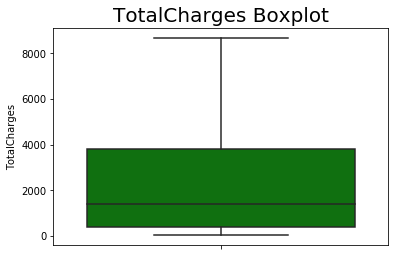

In [35]:
#box plot 3 >>>
plt.title('TotalCharges Boxplot', fontsize = 20)
sns.boxplot(df['TotalCharges'],color='green',orient='v')

Observation: No outliers seen in the TotalCharges column.

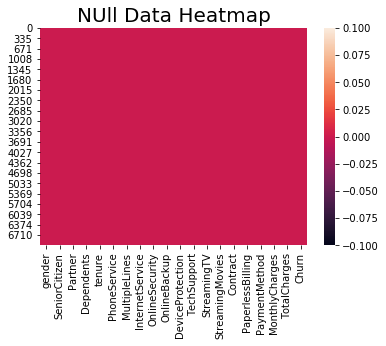

In [36]:
# checking presence of null values using heatmap:
plt.title('NUll Data Heatmap', fontsize = 20)
sns.heatmap(df.isnull())

In [37]:
# checking count of null values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation: we can see from the above heatmap and nullcount data, there is no Null values present in the dataset.

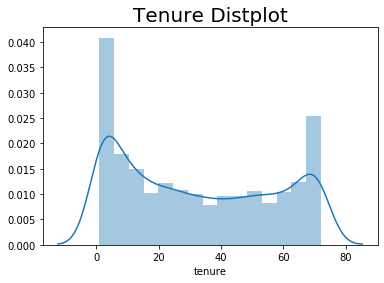

In [38]:
# distplot 1 >>>
plt.title('Tenure Distplot', fontsize = 20)
sns.distplot(df['tenure'])

Observation: we can see that in tenure column, data is not equally distributed.

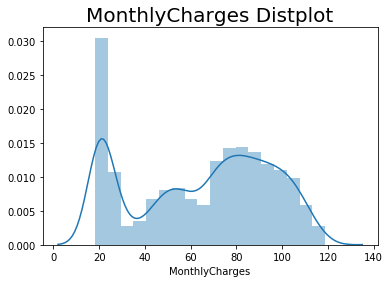

In [39]:
# distplot 2 >>>
plt.title('MonthlyCharges Distplot', fontsize = 20)
sns.distplot(df['MonthlyCharges'])

Observation: We can see that in the above MonthlyCharges column, data is not equally distributed.

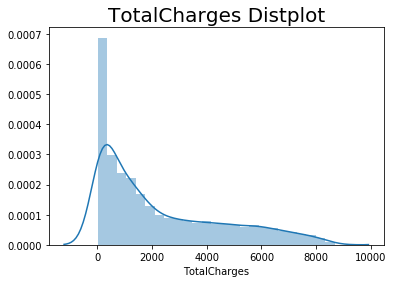

In [40]:
# distplot 3 >>>
plt.title('TotalCharges Distplot', fontsize = 20)
sns.distplot(df['TotalCharges'])

Observation: In the above TotalCharges column, there is slight skewness present in the dataset.

In [41]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges          int64
Churn                object
dtype: object

# BIVARIATE ANALYSIS:

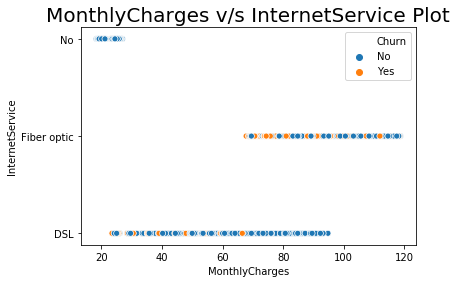

In [42]:
# scatter plot 1 >>>
plt.title('MonthlyCharges v/s InternetService Plot', fontsize = 20)

sns.scatterplot(df['MonthlyCharges'], df['InternetService'], hue=df['Churn'])

Observation: we can observe from the above Monthlycharges v/s Internetservice plot that, Most of the users having fibre optics and having moderate monthly charges have been churned.
    we can also observe almost no churned users present with No Internet services, while few users have been churned in DSL internet services having less monthly charges.

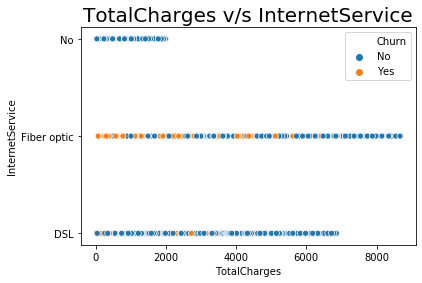

In [43]:
# scatter plot 1 >>>
plt.title('TotalCharges v/s InternetService', fontsize = 20)

sns.scatterplot(df['TotalCharges'], df['InternetService'], hue=df['Churn'])

Observation: We can also observe that from the above Totalcharges v/s Internet services plot that, users having FIbreOptics having less TotalCharges values have been churned.
we can also observe almost no churned users present with No Internet services, while few users have been churned in DSL internet services having moderate Totalcharges.

# LABEL ENCODING CATEGORICAL COLUMN:

In [44]:
LE = LabelEncoder()
    
df['gender'] = LE.fit_transform(df['gender'])
df['Partner'] = LE.fit_transform(df['Partner'])
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['PhoneService'] = LE.fit_transform(df['PhoneService'])
df['MultipleLines'] = LE.fit_transform(df['MultipleLines'])
df['InternetService'] = LE.fit_transform(df['InternetService'])
df['OnlineSecurity'] = LE.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = LE.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = LE.fit_transform(df['DeviceProtection'])
df['TechSupport'] = LE.fit_transform(df['TechSupport'])
df['StreamingTV'] = LE.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = LE.fit_transform(df['StreamingMovies'])
df['Contract'] = LE.fit_transform(df['Contract'])
df['PaperlessBilling'] = LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = LE.fit_transform(df['PaymentMethod'])
df['Churn'] = LE.fit_transform(df['Churn'])

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151,1


# CHECKING CORRELATION MATRIX:

In [46]:
df_cor = df.corr()

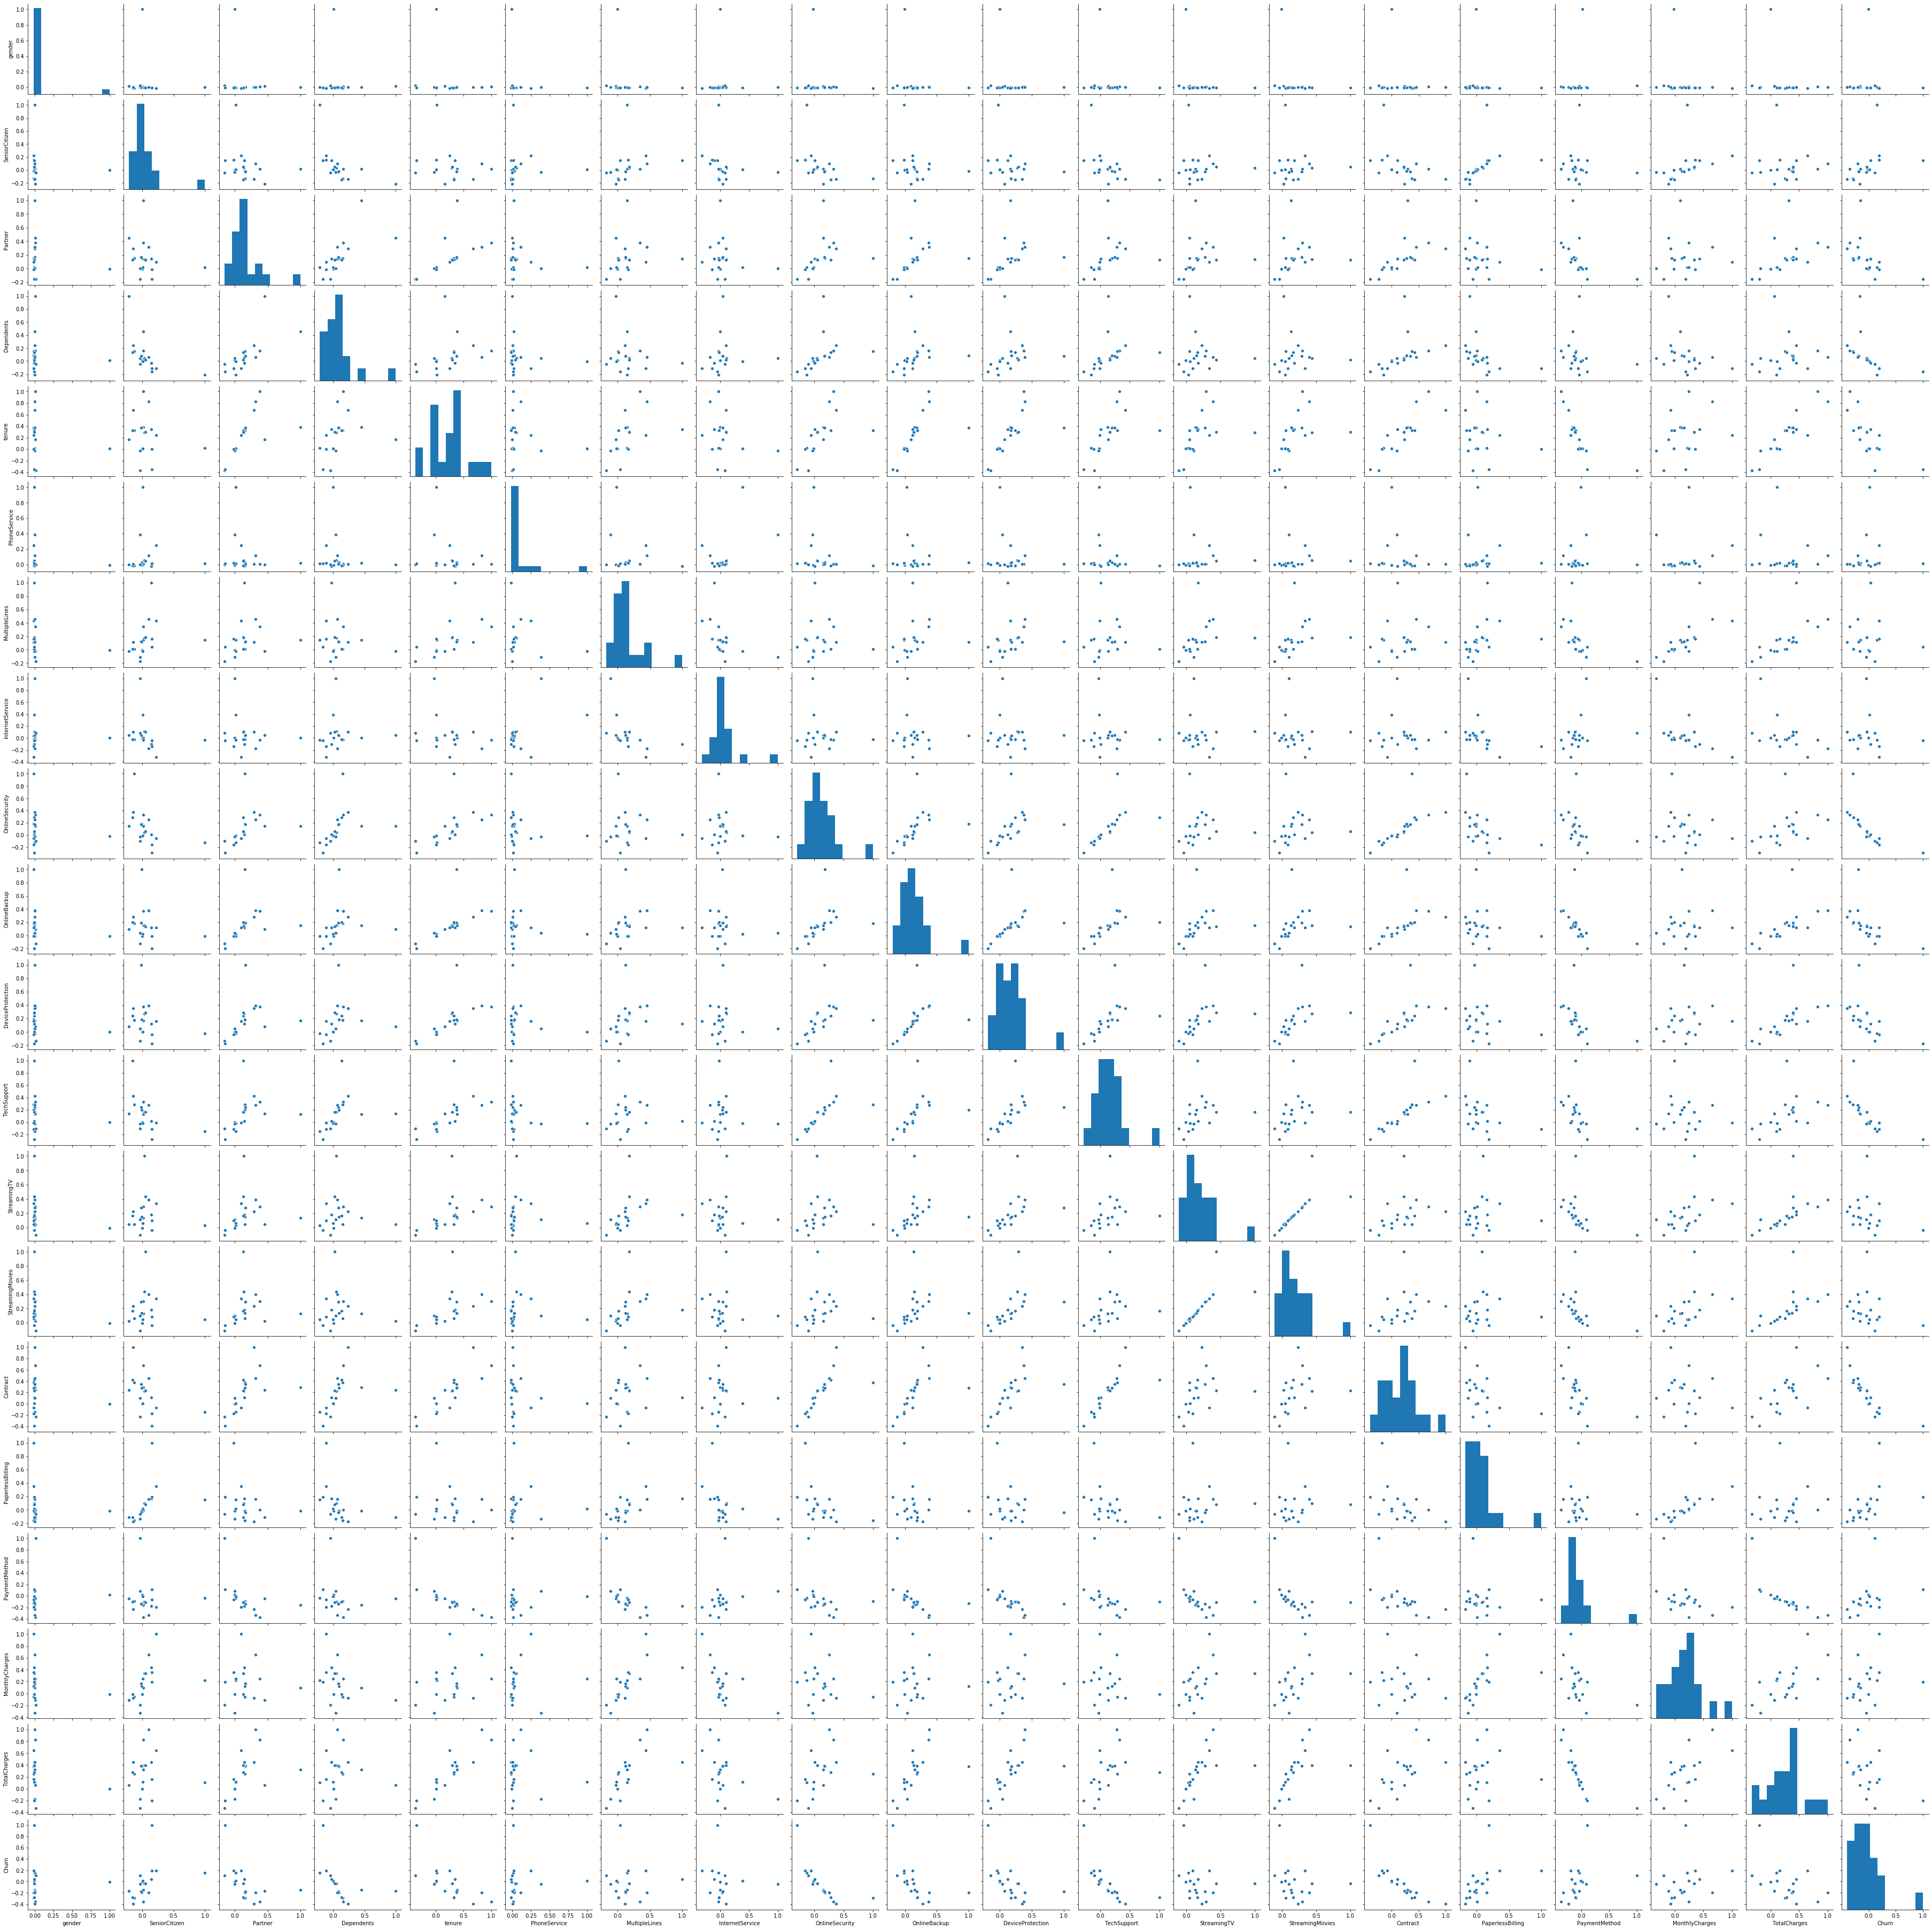

In [47]:
sns.pairplot(df_cor)

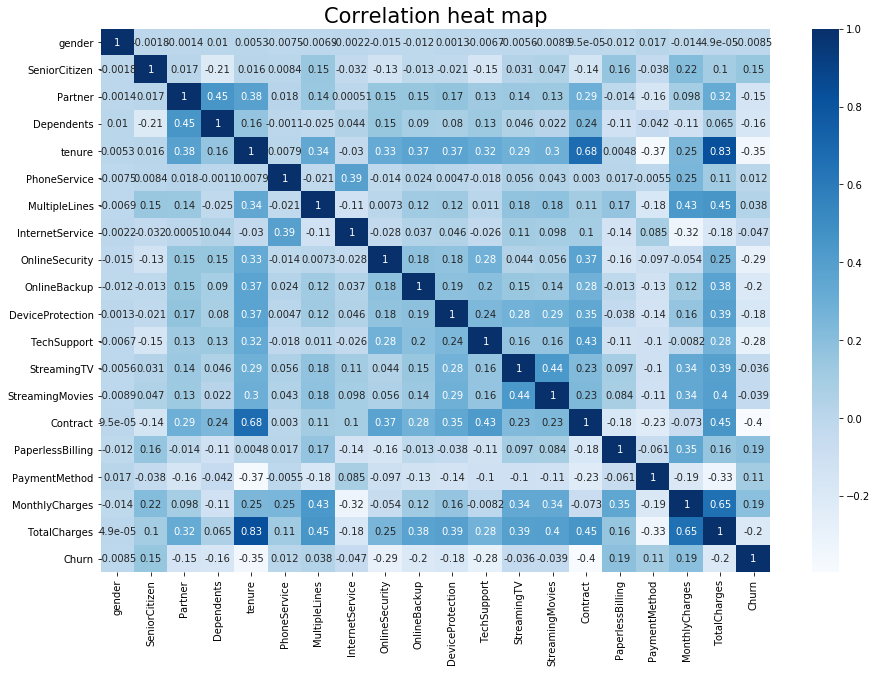

In [48]:
# plotting correlation matrix using heatmap
plt.figure(figsize=(15,10))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(df_cor,cmap='Blues', annot=True)

Observation: MonthlyCharges and TotalCharges columns are highly correlated with the Churn column.

In [49]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961636
Churn               1.060622
dtype: float64

OBSERVATION: We can see that there are skewness present in few columns but note that  most of the columns are originally categorical columns, Actual nuemerical skewness is present in TotalCharges column.

# REMOVING SKEWNESS BY REMOVING OUTLIERS USING ZSCORE METHOD:

In [50]:
from scipy.stats import zscore
# removing outliers with the help of zscore methods.
z=np.abs(zscore(df))

In [51]:
threshold = 3
print(np.where(z>threshold))

#creating new dataset without outliers and skewness
df_new = df[(z<3).all(axis=1)]

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
        568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
        687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
        841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
        938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
       1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
       1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
       1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
       1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
       1629, 1632, 1647, 1684, 1687, 1689, 1698, 1

# CHECKING DATALOSS AFTER OUTLIERS AND SKEWNESS REMOVAL:

In [52]:
print(((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

9.670079635949943


Observation: We can see that we are loosing almost 10% of data after removing outliers and skewness, so we can't afford to do so.

# CREATING X, Y DATASET:

In [53]:
# creating x,y dataset for further model building.
x = df.iloc[:,0:19]

In [54]:
y = df.iloc[:,-1]

In [55]:
x.shape

(7032, 19)

In [56]:
y.shape

(7032,)

# SCALING THE DATASET:

In [57]:
#Scaling the dataset::
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

X = pd.DataFrame(x_scaled, columns = columnslist)

# CHECKING BALANCING OF TARGET COLUMN:

In [58]:
#Before Balancing the dataset
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

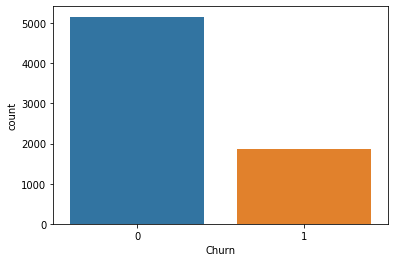

In [59]:
#plotting the imbalanced dataset:

ax = sns.countplot(x='Churn', data = df)


OBSERVATION: We can see that our 'Target' column is not balanced properly.

# BALANCING THE DATASET USING OVERSAMPLING TECHNIQUE:

In [60]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(X, y)


In [61]:
#After Balancing the dataset

y_over.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

OBSERVATION: Now we can see that our dataset is balanced.

# CREATING TRAIN TEST DATASET:

In [62]:
#creating train test dataset from the x and y part inorder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.20, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8260, 19)
(8260,)
(2066, 19)
(2066,)


# LOGISTIC REGRESSION METHOD:

In [63]:
# Logistic Regression:

LG = LogisticRegression()
LG.fit(x_train, y_train)
pred_ytest = LG.predict(x_test)
print('accuracy score - ', accuracy_score(y_test, pred_ytest))
print(confusion_matrix(y_test, pred_ytest))
print(classification_report(y_test, pred_ytest))

accuracy score -  0.7899322362052275
[[756 242]
 [192 876]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       998
           1       0.78      0.82      0.80      1068

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



Checking over fitting of the model using cross validation score:

In [64]:
print(cross_val_score(LG, x_over, y_over, cv=5).mean())

0.7794893455437862


# GAUSSIAN NB METHOD:

In [65]:
#As there are two target categories present in target column i.e. 'Churn' column.
# We can use GaussianNB algorithm for model making.

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predg = gnb.predict(x_test)
print(accuracy_score(y_test, predg))
print(confusion_matrix(y_test, predg))
print(classification_report(y_test, predg))

0.771539206195547
[[728 270]
 [202 866]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       998
           1       0.76      0.81      0.79      1068

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



Checking over fitting of the model using cross validation score:

In [66]:
print(cross_val_score(gnb, x_over, y_over, cv=5).mean())

0.7670934699703957


# DECISION TREE CLASSIFIER METHOD:

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.7957405614714425
[[801 197]
 [225 843]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       998
           1       0.81      0.79      0.80      1068

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



Checking over fitting of the model using cross validation score:

In [68]:
print(cross_val_score(dtc, x_over, y_over, cv=5).mean())

0.7796882537286496


# RANDOM FOREST CLASSIFIER METHOD:

In [69]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8552758954501453
[[859 139]
 [160 908]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       998
           1       0.87      0.85      0.86      1068

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



Checking over fitting of the model using cross validation score:

In [70]:
print(cross_val_score(rfc, x_over, y_over, cv=5).mean())

0.8512563843526811


# ADA BOOST CLASSIFIER METHOD:

In [71]:
adc = AdaBoostClassifier(n_estimators=100)
adc.fit(x_train, y_train)
pred=adc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8320425943852856
[[801 197]
 [150 918]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       998
           1       0.82      0.86      0.84      1068

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



Checking over fitting of the model using cross validation score:

In [72]:
print(cross_val_score(adc, x_over, y_over, cv=5).mean())

0.821427751043647


# SUPPORT VECTOR CLASSIFIER METHOD:

In [73]:
svc = SVC()
svc.fit(x_train, y_train)
pred= svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8112294288480155
[[780 218]
 [172 896]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       998
           1       0.80      0.84      0.82      1068

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Checking over fitting of the model using cross validation score:

In [74]:
print(cross_val_score(svc, x_over, y_over, cv=5).mean())

0.8037992729045612


# KNEAREST NEIGHBOUR CLASSIFIER METHOD:

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train, y_train)
predknc = knc.predict(x_test)
print('actual and predicted value score: ', accuracy_score(y_test, predknc))

actual and predicted value score:  0.7962245885769603


In [76]:
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test, predknc))

[[678 320]
 [101 967]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       998
           1       0.75      0.91      0.82      1068

    accuracy                           0.80      2066
   macro avg       0.81      0.79      0.79      2066
weighted avg       0.81      0.80      0.79      2066



Checking over fitting of the model using cross validation score:

In [77]:
print(cross_val_score(knc, x_over, y_over, cv=5).mean())

0.7902404665411867


# OBSERVATION:

GaussianNB model is our best fit model, because the difference between its accuracy score and cross validation score is least, which indicates least overfitting.
Thus, we'll consider GaussianNB model as our final model.

# HYPER PARAMETER TUNING:

In [78]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 cv=5,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.001873817422860383}

Checking hyper parameter on gaussianNB model.

In [79]:
# model making using hyper parameter information:

gnb_f = GaussianNB(var_smoothing = 0.0028)
gnb_f.fit(x_train, y_train)
predg_f = gnb_f.predict(x_test)
print(accuracy_score(y_test, predg_f))
print(confusion_matrix(y_test, predg_f))
print(classification_report(y_test, predg_f))

0.771539206195547
[[728 270]
 [202 866]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       998
           1       0.76      0.81      0.79      1068

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



Observation: We have observed that, after hyperparameter tuning our model's accuracy has not changed much. so  we'll consider our earlier model as our final model.

# AUC ROC CURVE:

In [80]:
# false positive rate: fpr
# true positive rate: tpr
# AUC : Area under curve.
# ROC : Receiver operating characteristic.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [81]:
y_pred_prob = gnb.predict_proba(x_test)[:,1]
y_pred_prob

array([9.96849390e-01, 5.07634235e-01, 4.35870999e-05, ...,
       9.28467138e-01, 8.02289620e-01, 8.37103790e-04])

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

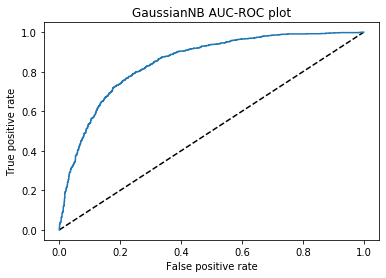

In [83]:
#plotting the tpr and fpr to make the graphs

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'GaussianNB AUC-ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB AUC-ROC plot')
plt.show()

In [84]:
auc_score = roc_auc_score(y_test, gnb.predict(x_test))
print(auc_score)

0.7701601705283226


# OBSERVATION:

OBSERVATION: Our model's AUC i.e. Area Under Score is 77.01% which is very good.

Our AUC-ROC curve is smoothly curved which indicates good model building.

# SAVING THE MODEL:

In [85]:
import joblib
joblib.dump(gnb, 'Vaibhav_Customer_Churn_Analysis_Model.pkl')

['Vaibhav_Customer_Churn_Analysis_Model.pkl']

# RELOADING THE MODEL:

In [86]:
#Reloading the model and predicting the dataset.
Vaibhav_Customer_Churn_Analysis_Model = joblib.load('Vaibhav_Customer_Churn_Analysis_Model.pkl')
Vaibhav_Customer_Churn_Analysis_Model.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

# CONCLUSION:

Our Final model is having accuracy of 77.153%, which is very good.


# THANK YOU